# Задачи проекта 

Необходимо провести разведывательный анализ данных и составить по его результатам отчет для того, чтобы по этим данным можно было построить модель предсказывающую результаты госэкзамена по математике среди учеников 15-22 лет.

### Импортируем  библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


# Для дальнейшего удобства предлагаю установить дополнительные параметры отображения датафрейма

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv(r'C:\Users\User\Desktop\Skillshare\Проект 2\stud_math.csv')

### Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Вывод:
* Переменных "studytime, granular" нет  в задании.
* В дата сете 30 переменных, из которых 13 числовых и 17 номинативных.

### Для удобства переименуем столбцы, что бы все были в одном регистре

In [3]:
df = df.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu',
                        'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob'})

## Предобработка 

In [4]:
def value_counts(name):
    """Возвращает уникальные значения"""
    display(pd.DataFrame(name.value_counts(dropna=False)))


def value_counts_p(name):
    """Возвращает уникальные значения в процентах"""
    display(pd.DataFrame(round(name.value_counts(
        dropna=False, normalize=True)*100, 1)))


def hist(name, bins):
    """Возвращает гистограмму"""
    return name.hist(bins=bins)


def replace_with_mode(column):
    """Заменяет пустые значения на моду"""
    mode = column.mode()[0]
    return column.apply(lambda x: mode if str(x).strip() == '' or pd.isna(x) else x)


def get_boxplot(column):
    """Возвращает boxplot"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Разбор переменных 

## score

баллы по госэкзамену по математике

In [5]:
value_counts(df.score)

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


6 пустых значений, удалим их, так как  это может повлиять на статистику

In [6]:
df = df.dropna(subset=['score'], axis=0).reset_index(drop=True)

### Рассмотрим распределения признака в процентном соотношении, построим гистограмму 

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

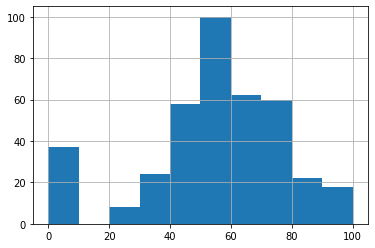

In [7]:
hist(df.score, bins=10)
df.score.describe()

Есть выбросы или неправильно заполненные данные, значения-'0'.Удалим строки с нулевыми оценками из анализа

In [8]:
df = df[df.score != 0].reset_index(drop=True)

### Выводы:
* Были выбросы в значение-"0" (скорее всего эти люди не сдавали экзамен)
* Большинство учеников имеют средний бал

## school

аббревиатура школы, в которой учится ученик

### Рассмотрим распределения признака и построим гистограмму и boxplot на основе оценок

,school
GP,311
MS,41


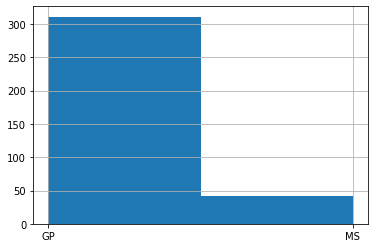

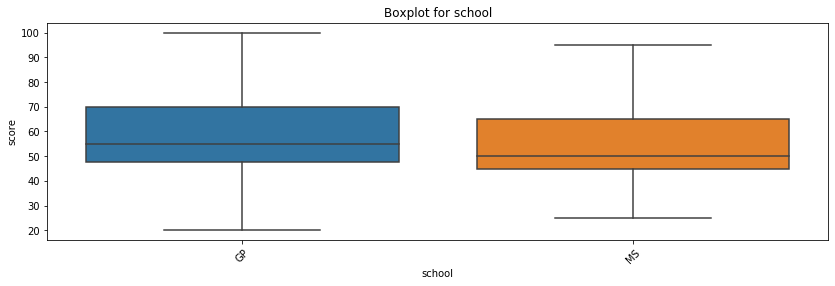

In [9]:
value_counts(df.school)
hist(df.school, bins=2)
get_boxplot('school')

### Вывод:
* GP - 349
* MS - 46
* В школе GP общий уровень подготовки выше, чем в школе MS
* Пустых значений нет

## sex

sex - пол ученика 

'F' - женский, 'M' - мужской

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,sex
F,182
M,170


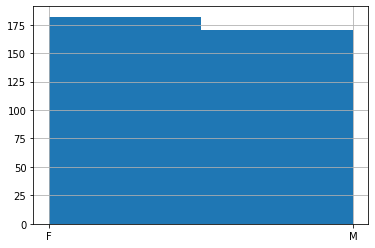

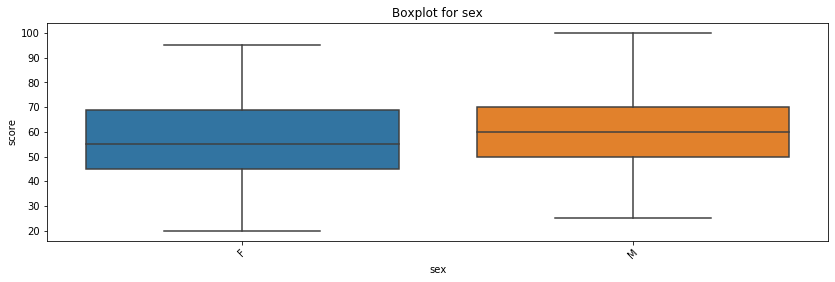

In [10]:
value_counts(df.sex)
hist(df.sex, bins=2)
get_boxplot('sex')

### Вывод:
* F - 182
* M  - 170
* Пустых значений нет.
* Мальчики в среднем лучше сдают экзамен по математике.

## age

возраст ученика (от 15 до 22)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,age
16,96
17,90
15,76
18,69
19,16
20,3
22,1
21,1


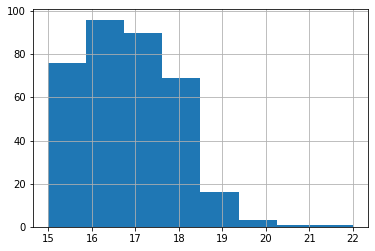

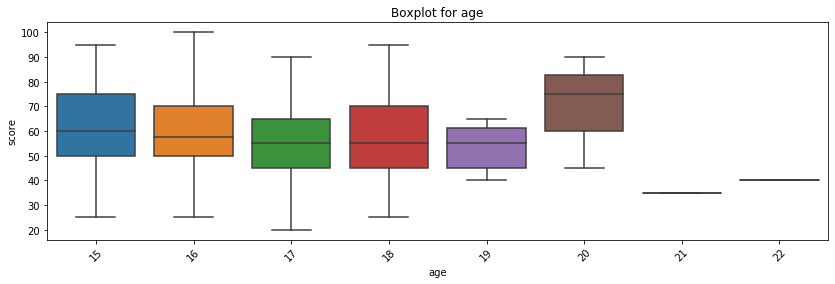

In [11]:
value_counts(df.age)
hist(df.age, bins=8)
get_boxplot('age')

### Вывод:
* Средний уровень оценок снижается с 15 до 17 лет (в 17 лет в среднем экзамен сдают хуже), с 18 до 20 лет средний уровень оценок повышается. В 20 лет максимальный уровень оценок
* Пустых значений нет.
* Выбросов нет, так как в задании указан возраст от 15 до 22

## address 

address — тип адреса ученика

'U' - городской, 'R' - за городом

In [12]:
value_counts(df.address)

,address
U,265
R,73
NaN,14


17 пустых значений, заменим их на моду


In [13]:
df.address = replace_with_mode(df.address)

### Рассмотрим распределения признака в процентном соотношении, построим гистограмму и boxplot на основе оценок

,address
U,79.3
R,20.7


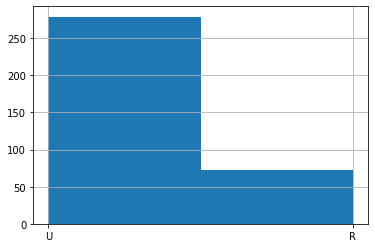

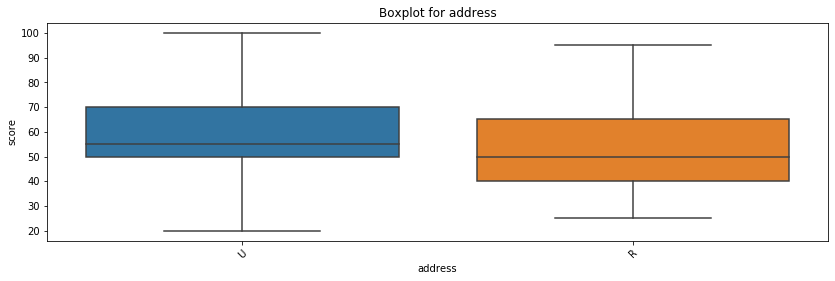

In [14]:
value_counts_p(df.address)
hist(df.address, bins=2)
get_boxplot('address')

### Вывод:
* 79%, а это 312 учеников живут в городе 
* 21%, а это 83 учеников живут за городом
* Жители города в среднем учатся лучше, чем ученики из пригорода

## famsize 

famsize — размер семьи

'LE3' <= 3, 'GT3' >3

In [15]:
value_counts(df.famsize)

,famsize
GT3,228
LE3,100
NaN,24


27 пропущенных значений, заменим их на моду 

In [16]:
df.famsize = replace_with_mode(df.famsize)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,famsize
GT3,71.6
LE3,28.4


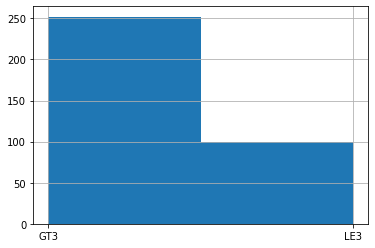

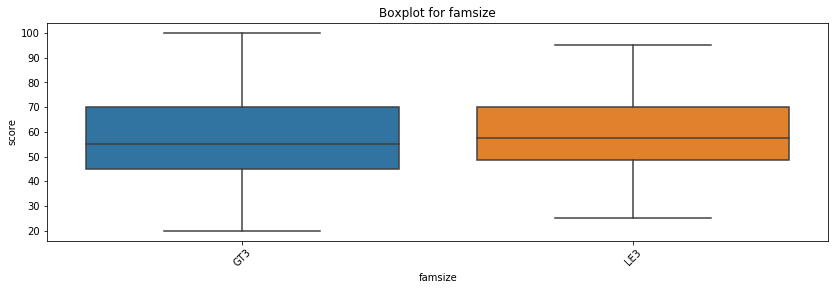

In [17]:
value_counts_p(df.famsize)
hist(df.famsize, bins=2)
get_boxplot('famsize')

### Вывод:
* У 73% учеников в семье больше 3 человек
* У 27% учеников до 3 человека в семье
* Размер семьи, в среднем, не влияет на оценки учеников

## Pstatus 

Pstatus — статус совместного жилья родителей

'T' - живут вместе 'A' - раздельно

In [18]:
value_counts(df.pstatus)

,pstatus
T,277
NaN,41
A,34


41 пропущенное значение,заменим пропущенные значения на моду


In [19]:
df.pstatus = replace_with_mode(df.pstatus)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,pstatus
T,90.3
A,9.7


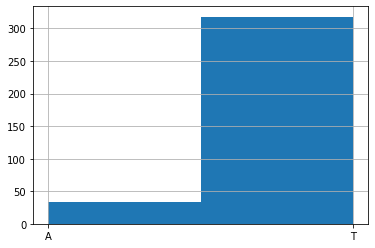

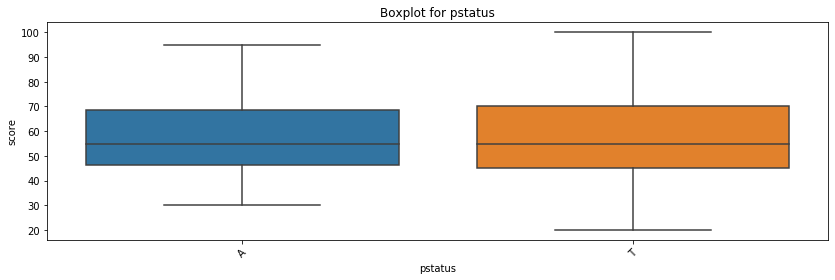

In [20]:
value_counts_p(df.pstatus)
hist(df.pstatus, bins=2)
get_boxplot('pstatus')

### Вывод:
* У 90% учеников родители живут вместе
* у 10% раздельно
* Много пропущенных значений (замененных на моду)
* Данный параметр практически не влияет на итоговый результат. Его можно удалить

In [21]:
df.drop(['pstatus'], inplace=True, axis=1)

## Medu

Medu - Образование матери

(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [22]:
value_counts(df.medu)

,medu
4.0,125
2.0,88
3.0,87
1.0,47
0.0,3
NaN,2


2 пропущенных значения, заменим их на моду

In [23]:
df.medu = replace_with_mode(df.medu)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,medu
4.0,36.1
2.0,25.0
3.0,24.7
1.0,13.4
0.0,0.9


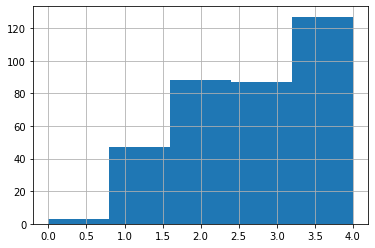

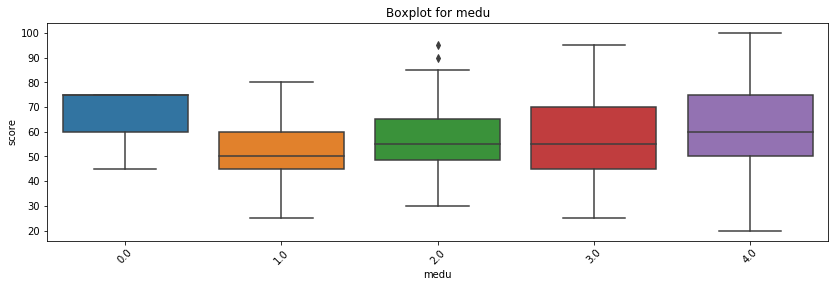

In [24]:
value_counts_p(df.medu)
hist(df.medu, bins=5)
get_boxplot('medu')

### Вывод:
* 34% имеют высшее образование
* 26 % 5-9 классов 
* 25 % среднее специальное 
* И менее 1% не имеют образования
* Пропуски заменили моду
* выбросы в значении '-2,0'
* В среднем оценка выше если образование матери 'высшее'

## Fedu

образование отца

(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


In [25]:
value_counts(df.fedu)

,fedu
2.0,94
3.0,89
4.0,80
1.0,65
NaN,21
0.0,2
40.0,1


21 пропущенных значений, заменяем на моду

In [26]:
df.fedu = replace_with_mode(df.fedu)

имеется ошибочное значение(40),заменяем его на 4 так как я думаю, что эта былa орфографическая ошибка 

In [27]:
# Исправим ошибку
df['fedu'] = df['fedu'].apply(lambda x: 4.0 if x == 40.0 else x)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,fedu
2.0,32.7
3.0,25.3
4.0,23.0
1.0,18.5
0.0,0.6


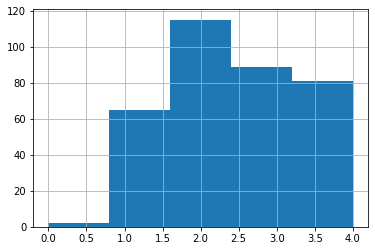

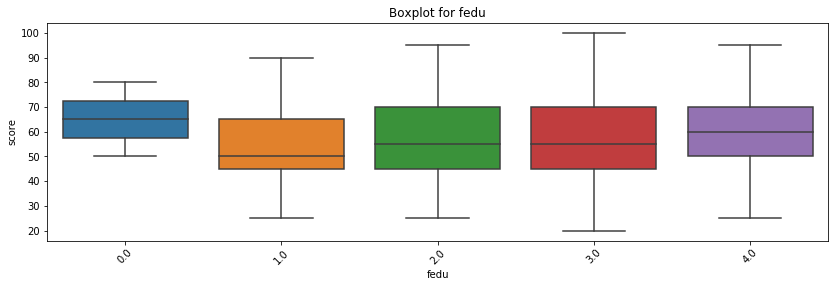

In [28]:
value_counts_p(df.fedu)
hist(df.fedu, bins=5)
get_boxplot('fedu')

### Вывод:
* 33 % образования отцов 5-9 классов
* 24 % среднее специальное или 11 классов
* 22 % высшее
* И менее 1 % не имеют образования
* Исправлена ошибка
* В среднем оценка выше если образование отца 'высшее'

## Mjob

Mjob — работа матери 

('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [29]:
value_counts(df.mjob)

,mjob
other,115
services,90
teacher,51
at_home,49
health,30
NaN,17


17 пустых значений,заменим их на моду

In [30]:
df.mjob = replace_with_mode(df.mjob)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,mjob
other,37.5
services,25.6
teacher,14.5
at_home,13.9
health,8.5


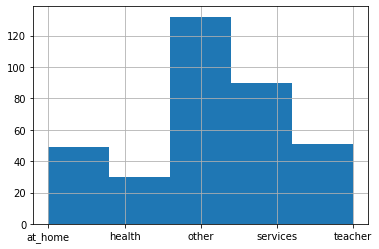

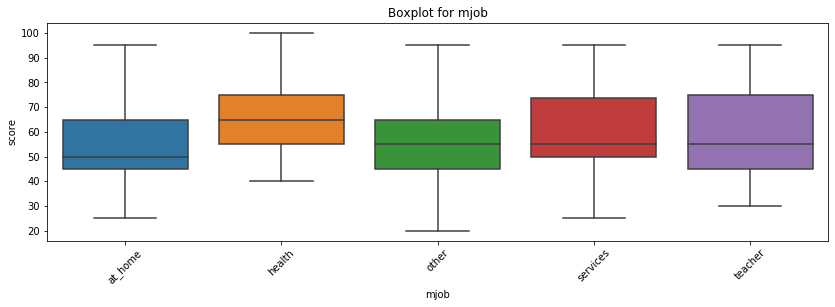

In [31]:
value_counts_p(df.mjob)
hist(df.mjob, bins=5)
get_boxplot('mjob')

### Вывод:
* большинство 38.5 % работа матери "другое"
* Меньше всего (8%) работают в сфере здравоохранения.
* Лучше всего сдают экзамен, если сфера работы матери в сфера здравоохранение
* Хуже если матери не работают

# Fjob 

Fjob — работа отца m

('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [32]:
value_counts(df.fjob)

,fjob
other,176
services,89
NaN,32
teacher,26
health,15
at_home,14


32 пустых значений, меня на моду

In [33]:
df.fjob = replace_with_mode(df.fjob)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,fjob
other,59.1
services,25.3
teacher,7.4
health,4.3
at_home,4.0


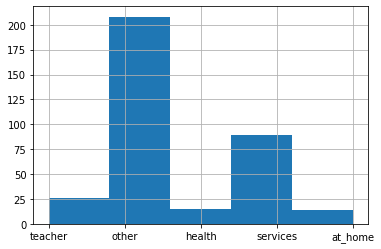

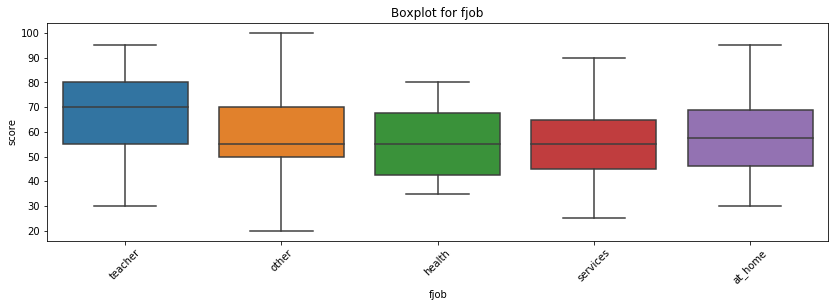

In [34]:
value_counts_p(df.fjob)
hist(df.fjob, bins=5)
get_boxplot('fjob')

### Вывод:
* 59% работа отца "другое"
* 25% гос служба
* 7% учитель
* 4% работа в сфере здравоохранения.
* 4% не работает
* Лучше всего сдают экзамен те ученики,у которых отец работают учителем

# Reason

reason — причина выбора школы 

('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [35]:
value_counts(df.reason)

,reason
course,119
reputation,96
home,89
other,33
NaN,15


15 пустых значений, заменяем на 'other', так как более удобный вариант

In [36]:
df.reason.fillna('other', inplace=True)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,reason
course,33.8
reputation,27.3
home,25.3
other,13.6


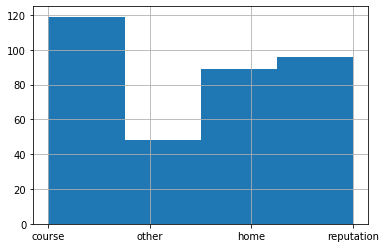

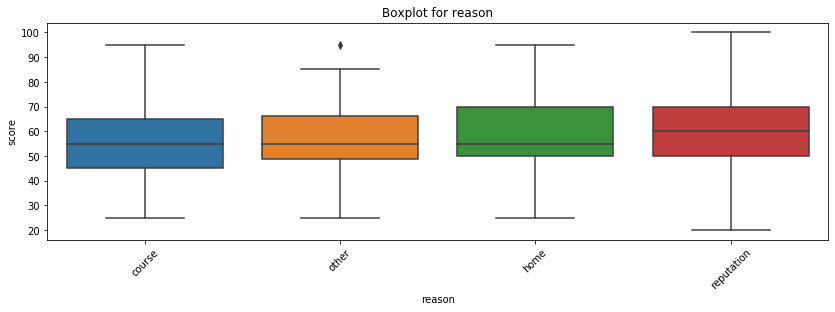

In [37]:
value_counts_p(df.reason)
hist(df.reason, bins=4)
get_boxplot('reason')

### Вывод:
* 38% выбрали школу из за образовательной программы
* 27% из за репутация школы
* По 25% выбрали из за близость к дому 
* 12% по другим причинам
* Есть выбросы
* Очевидных выводов по данной колонке нет.

# Guardian

guardian — опекун 
 
('mother' - мать, 'father' - отец, 'other' - другое)

In [38]:
value_counts(df.guardian)

,guardian
mother,225
father,78
NaN,29
other,20


29 пустое значение, заменяем на "other"

In [39]:
df.guardian.fillna('other', inplace=True)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,guardian
mother,63.9
father,22.2
other,13.9


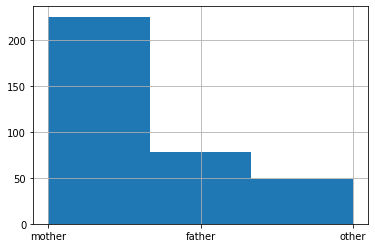

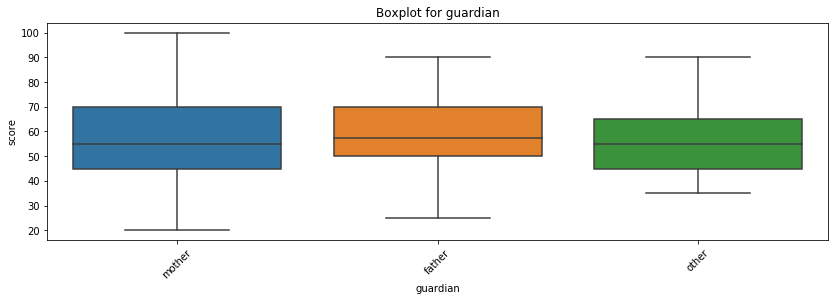

In [40]:
value_counts_p(df.guardian)
hist(df.guardian, bins=3)
get_boxplot('guardian')

# вывод:
* В 63% опекут мать
* В 21% опекун отец
* И 15% другой вариант
* Пропуски заменены на "other"
* Если у ученика опекун отец,в среднем экзамен сдается лучше и разброс оценок меньше.

# Traveltime

traveltime — время в пути до школы 

(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [41]:
value_counts(df.traveltime)

,traveltime
1.0,219
2.0,86
NaN,23
3.0,17
4.0,7


23 пустых значений,заменим их на моду

In [42]:
df.traveltime = replace_with_mode(df.traveltime)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,traveltime
1.0,68.8
2.0,24.4
3.0,4.8
4.0,2.0


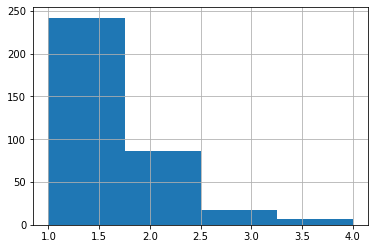

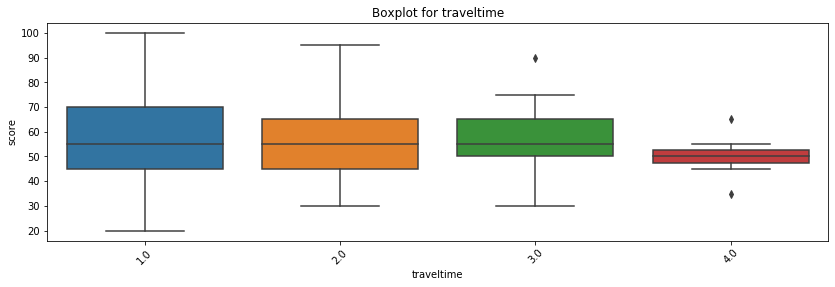

In [43]:
value_counts_p(df.traveltime)
hist(df.traveltime, bins=4)
get_boxplot('traveltime')

### вывод:
* 68% учеников тратят на дорогу до школы не более 15 мин.
* 24% 15-20 минут
* 5% 30-60 минут
* 2% больше часа
* Большинство значений находятся в одной группе
* Есть выбросы
* Диаграмма показывает отсутствие значимого влияния данного параметра на итоговый результат, поэтому данный столбец можно удалить из анализа

In [44]:
df.drop(['traveltime'], inplace=True, axis=1)

# Studytime

studytime — время на учёбу помимо школы в неделю

(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [45]:
value_counts(df.studytime)

,studytime
2.0,173
1.0,90
3.0,58
4.0,24
NaN,7


7 пустых значений, заменим их на моду

In [46]:
df.studytime = replace_with_mode(df.studytime)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,studytime
2.0,51.1
1.0,25.6
3.0,16.5
4.0,6.8


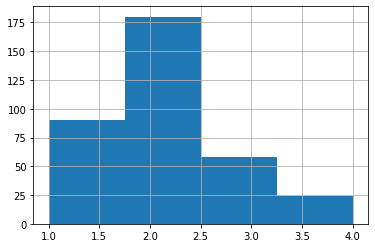

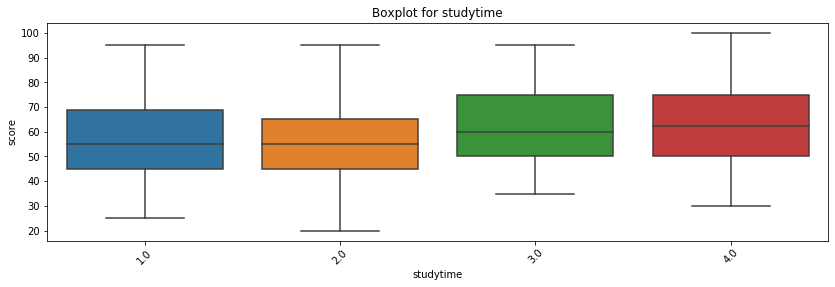

In [47]:
value_counts_p(df.studytime)
hist(df.studytime, bins=4)
get_boxplot('studytime')

### Вывод:
* 51% ученики тратят время на учебу помимо школы от 2-5 часов в день
* 26% до 2 часов в день
* 16% 5-10 часов в день
* 7% больше 10 часов в день

#  Failures

failures — количество внеучебных неудач 

(n, если 1<=n<3, иначе 4)

In [48]:
value_counts(df.failures)

,failures
0.0,273
1.0,38
NaN,20
2.0,11
3.0,10


Так как  самое большое значения "0", и его нет в описание, эта ошибка. Целесообразно его удалить данный столбец он не несет никакой смысловой нагрузки, т.к. вся информация искажена 

In [49]:
df.drop(['failures'], inplace=True, axis=1)

### Вывод:
* Колонка не представляет интереса для анализа.

# Schoolsup 

schoolsup — дополнительная образовательная поддержка 

(yes или no)

In [50]:
value_counts(df.schoolsup)

,schoolsup
no,295
yes,48
NaN,9


9 пустых значений, заменим их на моду

In [51]:
df.schoolsup = replace_with_mode(df.schoolsup)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,schoolsup
no,86.4
yes,13.6


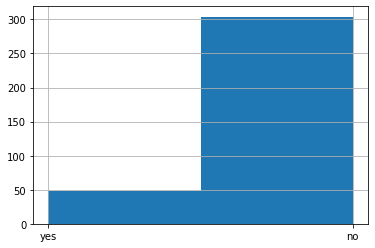

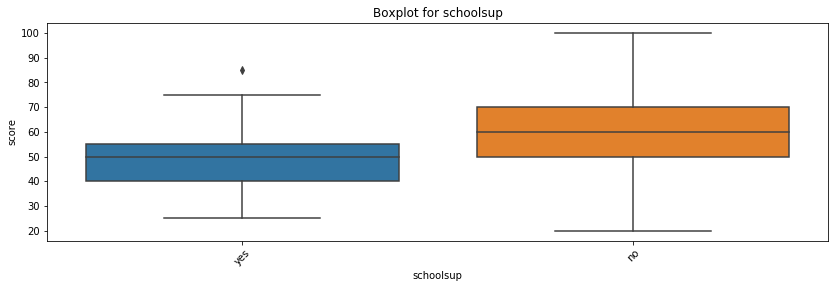

In [52]:
value_counts_p(df.schoolsup)
hist(df.schoolsup, bins=2)
get_boxplot('schoolsup')

### Вывод:
* Больше всего 87% учеников не пользуются дополнительной образовательной поддержкой
* И только 13% пользуются дополнительной образовательной поддержкой
* Когда дополнительной образовательной поддержки нет в среднем экзамен сдается лучше, но и разброс оценок больше.
* Присутствует выброс, оценка этого выброса все равно ниже придела третьего квартиля
* Интересные данные,более подробнее расмотрим его в дальнейшем

# Famsup 

famsup — семейная образовательная поддержка 

(yes или no)

In [53]:
value_counts(df.famsup)

,famsup
yes,196
no,120
NaN,36


36 пустых значений, меняем на моду

In [54]:
df.famsup = replace_with_mode(df.famsup)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,famsup
yes,65.9
no,34.1


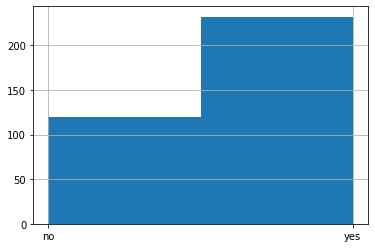

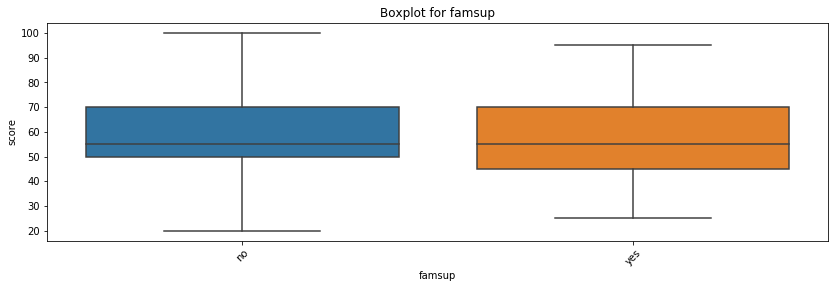

In [55]:
value_counts_p(df.famsup)
hist(df.famsup, bins=2)
get_boxplot('famsup')

### Вывод:
* Больше всего 65% учеников пользуются семейной образовательной поддержкой.
* А 35% не пользуются
* Судя по графикам, семейная образовательная поддержка значимого влияния на результат не оказывает,поэтому столбец можно удалять

In [56]:
df.drop(['famsup'], inplace=True, axis=1)

# Paid

paid — дополнительные платные занятия по математике 

(yes или no)

In [57]:
value_counts(df.paid)

,paid
no,170
yes,146
NaN,36


36 пустых значений, заменим их на моду

In [58]:
df.paid = replace_with_mode(df.paid)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,paid
no,58.5
yes,41.5


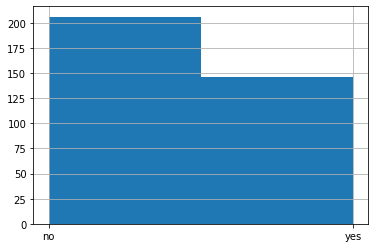

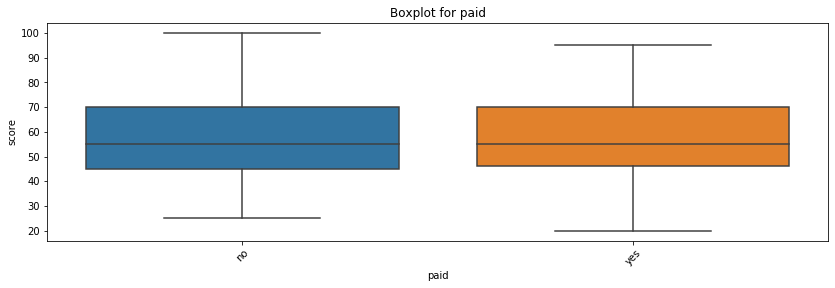

In [59]:
value_counts_p(df.paid)
hist(df.paid, bins=2)
get_boxplot('paid')

### вывод:
* Большинство 61% семей не платят за доп.занятия по математике
* 40% оплачивают доп.занятия по математике
* Много незаполненных значений,и судя по графикам, дополнительные платные занятия значимого влияния на результат не оказывает, столбец можно удалять

In [60]:
df.drop(['paid'], inplace=True, axis=1)

# Activities 

activities — дополнительные внеучебные занятия 

(yes или no)

In [61]:
value_counts(df.activities)

,activities
yes,172
no,168
NaN,12


12 пустых значений, заменим их на моду

In [62]:
df.activities = replace_with_mode(df.activities)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,activities
yes,52.3
no,47.7


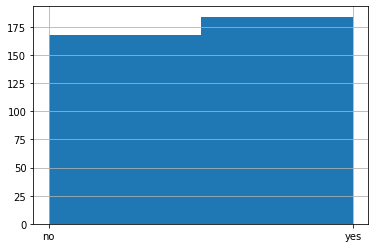

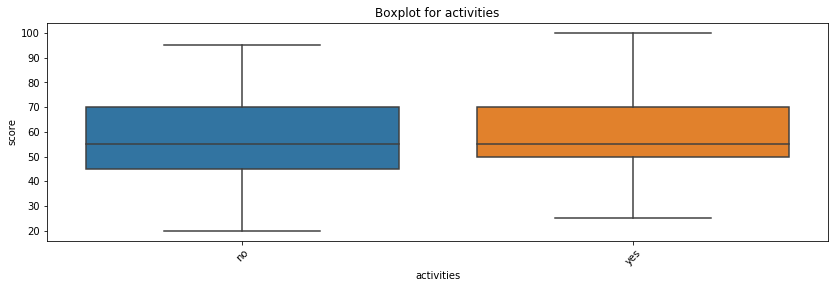

In [63]:
value_counts_p(df.activities)
hist(df.activities, bins=2)
get_boxplot('activities')

### Вывод:
* 52% кто посещает доп.вне учебные занятия
* 48% кто не посещает
* Пропуски заменили на моду(хоть два значения и равны, но "yes" больше)
* При примерно равном медианном значении общий уровень оценок при наличии дополнительных вне учебных занятий выше (выше среднее значение, 1 и 3 квартили)

# Nursery 

nursery — посещал детский сад 

(yes или no)

In [64]:
value_counts(df.nursery)

,nursery
yes,272
no,68
NaN,12


16 пустых значений, заменим их на моду

In [65]:
df.nursery = replace_with_mode(df.nursery)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,nursery
yes,80.7
no,19.3


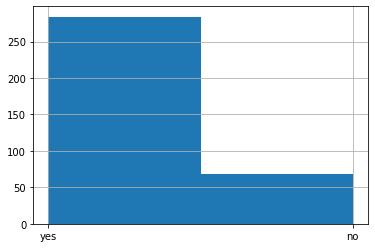

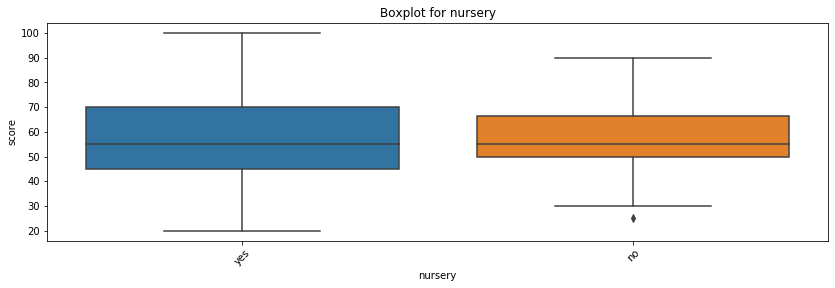

In [66]:
value_counts_p(df.nursery)
hist(df.nursery, bins=2)
get_boxplot('nursery')

### Вывод:
* 80% школьников посещали детский сад
* 20% нет
* Пока вывод о значимости параметра сделать нельзя.

# Неописанный столбец 'studytime, granular'

Про данный столбец нет описания, но возможно он относиться к столбцу studytime

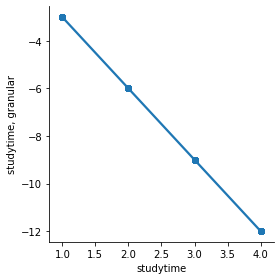

In [67]:
sns.lmplot(x='studytime', y='studytime, granular', height=4, data=df)
plt.show()

По графику видна линейная зависимость между столбцами. Проверим коэффициентом корреляции.

In [68]:
# Проверим корреляцию:
df.corr().loc['studytime', 'studytime, granular']

-0.9999999999999968

### Вывод:
* Практически 100% корреляция, столбец можно удалить.

In [69]:
df.drop(['studytime, granular'], inplace=True, axis=1)

# Higher 

higher — хочет получить высшее образование

(yes или no)


In [70]:
value_counts(df.higher)

,higher
yes,320
NaN,19
no,13


19 пропущенных значений, меня на моду

In [71]:
df.higher = replace_with_mode(df.higher)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,higher
yes,96.3
no,3.7


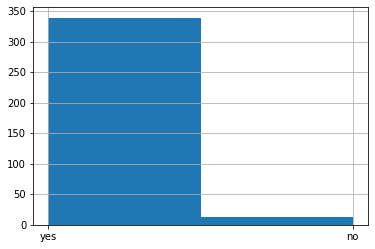

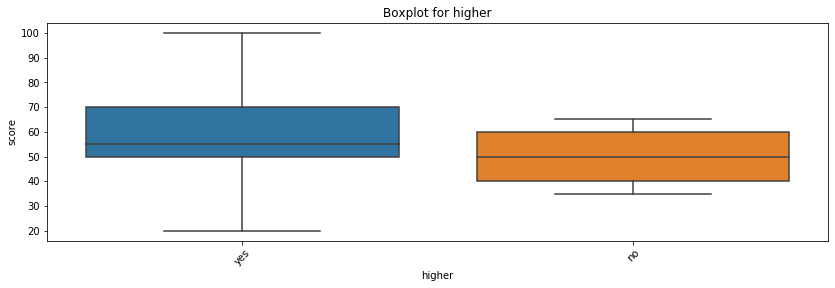

In [72]:
value_counts_p(df.higher)
hist(df.higher, bins=2)
get_boxplot('higher')

### Вывод:
* 96% школьников говорят, что хотят получить высшее образование
* 4 % не хотят
* Уровень сдачи экзамена у тех, кто не хочет получать высшее образование ниже.

# Internet 

internet — наличие интернета дома 

(yes или no)

In [73]:
value_counts(df.internet)

,internet
yes,274
no,49
NaN,29


29 пропущенных значений,меня их на моду

In [74]:
df.internet = replace_with_mode(df.internet)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,internet
yes,86.1
no,13.9


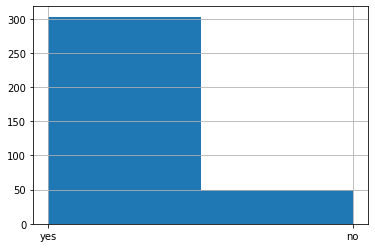

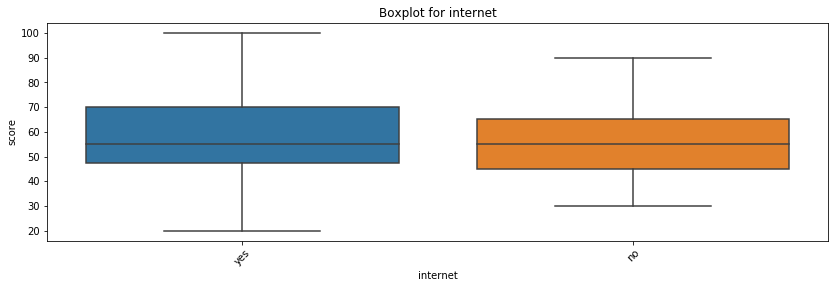

In [75]:
value_counts_p(df.internet)
hist(df.internet, bins=2)
get_boxplot('internet')

### Вывод:
* У 86% учеников есть интернет
* У 14% отсутствует 
* При примерно равной медиане, уровень сдачи экзамена у тех, у кого есть интернет выше. Разброс тоже выше из-за большего количества значений.

# Romantic

romantic — в романтических отношениях

(yes или no)

In [76]:
value_counts(df.romantic)

,romantic
no,219
yes,104
NaN,29


29 пропущенное значение, заменим его на моду

In [77]:
df.romantic = replace_with_mode(df.romantic)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,romantic
no,70.5
yes,29.5


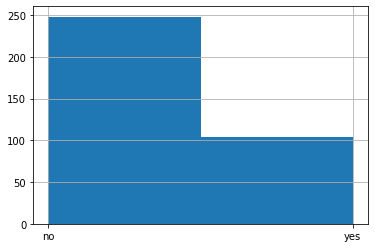

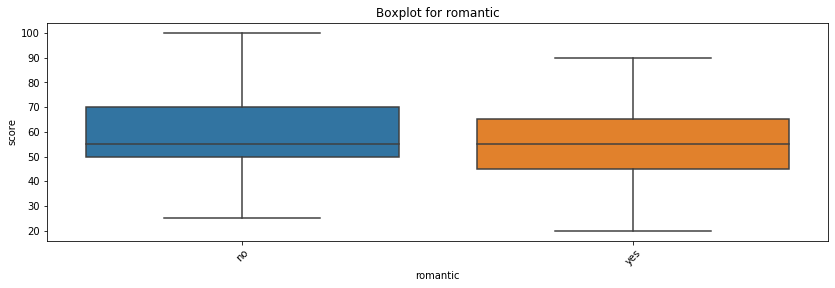

In [78]:
value_counts_p(df.romantic)
hist(df.romantic, bins=2)
get_boxplot('romantic')

### Вывод:
* 70,5% не состоят в романтических отношениях
* 29,5% состоят в романтических отношениях
* При примерно одинаковом медианном значении, общий уровень оценки выше у тех, у кого нет романтических отношений.

# Famrel

famrel — семейные отношения 

(от 1 - очень плохо до 5 - очень хорошо)

In [79]:
value_counts(df.famrel)

,famrel
4.0,163
5.0,88
3.0,56
NaN,24
2.0,14
1.0,6
-1.0,1


24 пустых значений, заменим на моду 

In [80]:
df.famrel = replace_with_mode(df.famrel)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,famrel
4.0,53.1
5.0,25.0
3.0,15.9
2.0,4.0
1.0,1.7
-1.0,0.3


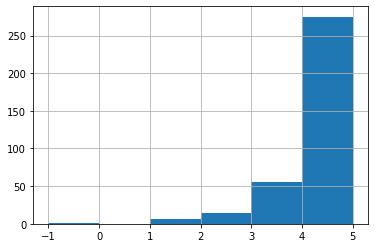

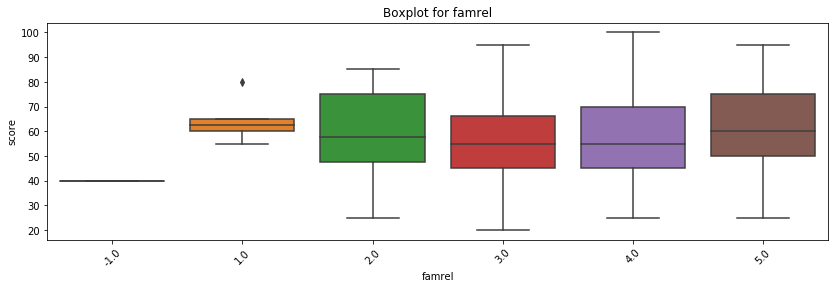

In [81]:
value_counts_p(df.famrel)
hist(df.famrel, bins=6)
get_boxplot('famrel')


Есть выброс - значение '-1'. Скорее всего, хотели написать значение '1'.

In [82]:
# Исправим ошибку
df.famrel = df.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

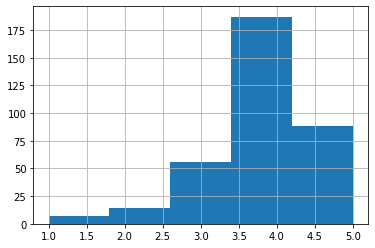

In [83]:
# посмотрим на гистограмму исправленных данных
hist(df.famrel, bins=5)

#### Вывод:
* 53% имеют по шкале отношений '4'
* 25% очень хорошо
* 16% удовлетворительно
* 4% плохо
* 2% очень плохо
* Основные значения от 3 до 5
* Есть выбросы
* Окончательный вывод по параметру пока сделать нельзя из-за непропорционального распределения между группами

# Freetime 

freetime — свободное время после школы 

(от 1 - очень мало до 5 - очень мого

In [84]:
value_counts(df.freetime)

,freetime
3.0,132
4.0,102
2.0,59
5.0,35
1.0,16
NaN,8


8 пустых значений, заменим их на моду

In [85]:
df.freetime = replace_with_mode(df.freetime)

### Рассмотрим распределения признака, построим гистограмму 

,freetime
3.0,39.8
4.0,29.0
2.0,16.8
5.0,9.9
1.0,4.5


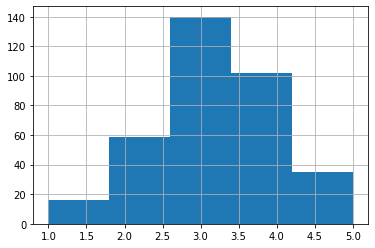

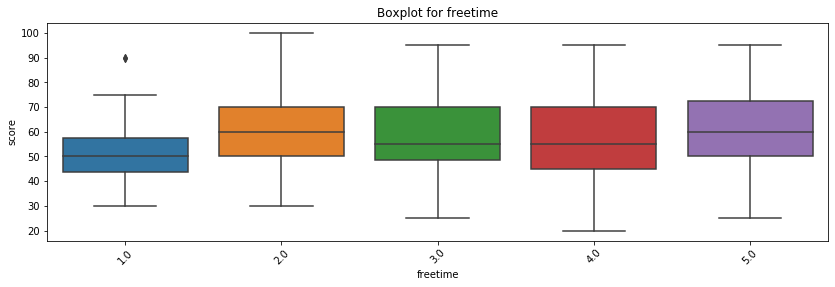

In [86]:
value_counts_p(df.freetime)
hist(df.freetime, bins=5)
get_boxplot('freetime')

### Вывод:
* 41% имеют свободное время '3' по шкале от 1 до 5
* 29% много свободого времени после школы
* 9% имеют очень много свободого времени после школы
* 5% очень  мало
* Окончательный вывод по параметру пока сделать нельзя.

# Goout 

goout — проведение времени с друзьями 

(от 1 - очень мало до 5 - очень много)

In [87]:
value_counts(df.goout)

,goout
3.0,118
2.0,92
4.0,74
5.0,43
1.0,19
NaN,6


6 пропущенных значений, заменим их на моду

In [88]:
df.goout = replace_with_mode(df.goout)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,goout
3.0,35.2
2.0,26.1
4.0,21.0
5.0,12.2
1.0,5.4


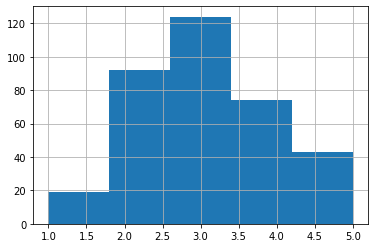

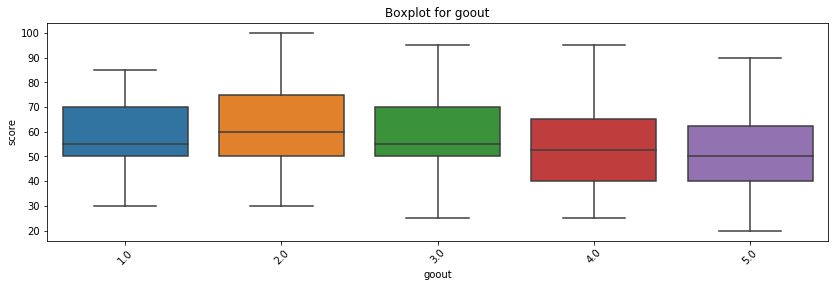

In [89]:
value_counts_p(df.goout)
hist(df.goout, bins=5)
get_boxplot('goout')

### Вывод:
* Большинство (34%) проводят время с друзьями '3' по шкале от 1 до 5
* 13% проводят очень много времени с друзьями
* а 6% - совсем мало
* При наличие небольшой социальный жизни оценки улучшаются, но при активной ухудщаються, что логично

# Health 

health — текущее состояние здоровья 

(от 1 - очень плохо до 5 - очень хорошо)

In [90]:
value_counts(df.health)

,health
5.0,124
3.0,81
4.0,53
1.0,45
2.0,36
NaN,13


13 пустых значений, заменим их на моду

In [91]:
df.health = replace_with_mode(df.health)

### Рассмотрим распределения признака, построим гистограмму и boxplot на основе оценок

,health
5.0,38.9
3.0,23.0
4.0,15.1
1.0,12.8
2.0,10.2


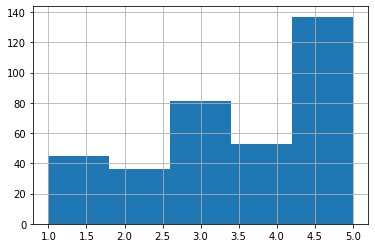

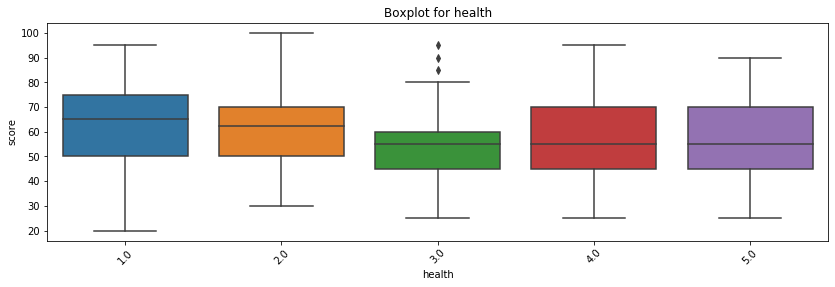

In [92]:
value_counts_p(df.health)
hist(df.health, bins=5)
get_boxplot('health')

### вывод
* Большинство учеников (39%) имеют очень хорошее здоровье
* Есть выбросы
* Окончательный вывод по параметру пока сделать нельзя.

# Absences 

absences — количество пропущенных занятий¶

In [93]:
value_counts(df.absences)

,absences
0.0,74
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
NaN,10
16.0,7


10 пропущенных значений, заменим их на моду

In [94]:
df.absences = replace_with_mode(df.absences)

### Рассмотрим распределения признака, построим гистограмму

,absences
0.0,23.9
2.0,17.0
4.0,14.8
6.0,8.5
8.0,5.7
10.0,4.8
12.0,3.4
14.0,3.4
3.0,2.0
16.0,2.0


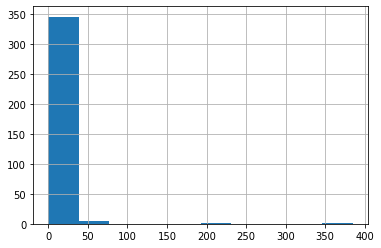

In [95]:
value_counts_p(df.absences)
hist(df.absences, bins=10)

Есть выбросы, отфильтруем значения выше 75

In [96]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
df = df.loc[df.absences <= perc75 + 1.5*IQR].reset_index()

Посмотрим на исправленные данные

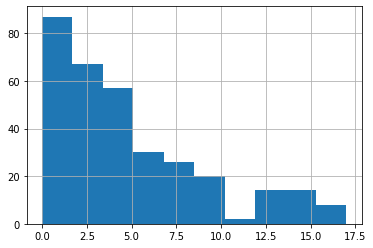

In [97]:
hist(df.absences, bins=10)

### Вывод:
* были выбросы
* Большинство  ученика не пропустили ни одного занятия

# Корреляционный анализ

### Посмотрим корреляцию числовых столбцов

In [98]:
pd.DataFrame(df.corr()['score']).sort_values('score')

,score
absences,-0.236344
goout,-0.166659
age,-0.137150
health,-0.087953
index,-0.028083
freetime,-0.006340
famrel,0.059528
fedu,0.127254
studytime,0.142065
medu,0.184968


### Предварительный вывод:
Средний уровень корреляции с оценкой за экзамен наблюдается у следующих параметров:
* возраст(отрицательная корреляция)
* проведеное время с друзьями (отрицательная корреляция)
* уровень образования родителей(положительная корреляция), при этом уровень образования матери больше влияет на оценку, чем уровень образования отца
* время на учёбу помимо школы(положительная корреляция)


# Проанализируем номинативные переменные:

#### Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по экзамену по математике по различным параметрам неразличимы: неразличимы:

In [99]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)



Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


#### Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: medu, fedu, studytime, age, goout, sex, address, mjob, higher, romantic

### Сформируем итоговый дата фрейм для модели

In [100]:
df_2 = df.loc[:, ['medu', 'fedu', 'studytime', 'age','goout', 'sex', 'address', 'mjob', 'higher', 'romantic']]
df_2

,medu,fedu,studytime,age,goout,sex,address,mjob,higher,romantic
0,4.0,4.0,2.0,18,4.0,F,U,at_home,yes,no
1,1.0,1.0,2.0,17,3.0,F,U,at_home,yes,no
2,1.0,1.0,2.0,15,2.0,F,U,at_home,yes,no
3,4.0,2.0,3.0,15,2.0,F,U,health,yes,yes
4,3.0,3.0,2.0,16,2.0,F,U,other,yes,no
...,...,...,...,...,...,...,...,...,...,...
320,3.0,1.0,2.0,18,4.0,F,U,teacher,yes,no
321,3.0,1.0,1.0,17,5.0,M,U,services,yes,no
322,1.0,1.0,1.0,21,3.0,M,R,other,yes,no
323,3.0,2.0,1.0,18,1.0,M,R,services,yes,no


# ВЫВОДЫ:

### В результате  исследование  условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике проделана следующая работа и  были получены следующие выводы:
#### Работа на проектом
* Каждая колонка была проверена, на распределения признака и в процентном соотношении, количество пропусков, наличие выбросов, значения параметров, влияние параметра на итоговую оценку с помощью диаграмм boxplot и таблиц корреляции
* Пустые значения были заменены или удалены
* Столбец "studytime, granular" полностью копировал столбец "studytime"
* Удалено несколько колонок,"pstatus"-из-за большого количества пропусков и отсутствия значимого влияния на конечный балл, "failures" - количество пустых значений превышает кол-во значений в двух заполненных признаках, подавляющее большинство данных имеет значение 0(которого нет описании),"famsup" - много незаполненных значений и судя по графикам, семейная образовательная поддержка значимого влияния на результат не оказывает.
* Были удаленны некоторые выбросы и исправлены ошибки

#### Сделаны следующие выводы
* Большинство учеников имеют оценки по математике выше среднего
* 60% учащихся практически не пропускают занятия
* Жители города учатся лучше, чем ученики из пригорода
* Большое количество времени проведенное с друзьями, отрицательно влияет на итоговую оценку
* Желание получить высшее образование улучшает итоговую оценку
* Когда дополнительной образовательной поддержки нет в среднем экзамен сдается лучше
* Общий уровень оценки выше у тех, у кого нет романтических отношений.

#### при помощи  корреляционного анализа и теста Стьюдента были избраны  параметры, которые могут влиять на результаты сдачи экзамена по математике
* образование отцов - fedu
* образование матери - medu
* количество вне учебных занятий - studytime
* возраст ученика - age
* количество времени, затрачиваемого на общение с друзьями - goout
* пол - sex
* адрес - address
* работа матери - mjob
* желание продолжать учебу и поступать в институт - higher
* состояние в романтических отношениях - romantic
